**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Active Class 2**

*   M3: Análisis, visualización y transformación de datos

---

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


En esta actividad usarás el archivo de datos `uber.csv`. Los datos contienen información sobre el clima, la ubicación y las recogidas.

* `pickup_dt`: Fecha y hora de la recogida
* `borough`: ciudad de Nueva York
* `pickups`: Número de recogidas para el periodo (1 hora)
* `spd`: Velocidad del viento en millas/hora
* `vsb`: Visibilidad en millas
* `temp`: Temperatura en Fahrenheit
* `dewp`: Punto de rocío en Fahrenheit
* `slp`: Presión a nivel del mar
* `pcp01`: precipitación líquida de 1 hora
* `pcp06`: precipitación líquida de 6 horas
* `pcp24`: precipitación líquida de 24 horas
* `sd`: Profundidad de la nieve en pulgadas
* `hday`: Es festivo (Y) o no (N)

Descarga el archivo: `uber.csv` y guarda, en un dataframe (`uber_df`), todos sus registros.

In [48]:
import pandas as pd
uber_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Active class 2/uber.csv')
uber_df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [49]:
import numpy as np

# Librerías para visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Librería para extraer funciones de fecha y hora
import datetime as dt

In [50]:
# Primeras 5 observaciones
uber_df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [51]:
# Últimas 5 observaciones
uber_df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


* La columna p`ickup_dt` incluye la fecha y hora de recogida.
* La fecha muestra que los datos comenzaron el 1 de enero de 2015 hasta el 30 de junio de 2015. Esto significa que tenemos seis meses de datos para analizar.
* La columna `borough` contiene el nombre de la ciudad de Nueva York en la que se realizó la recogida.
* La columna `pickups` contiene el número de recogidas en un momento dado.
* Todas las variables meteorológicas son numéricas.
* La variable `hday` es una variable categórica.

In [52]:
uber_df.shape

(29101, 13)

In [53]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


* Todas las columnas tienen 29101 observaciones excepto la ciudad (`borough`), que tiene 26058 observaciones, lo que indica que contiene valores nulos.
* `pickup_dt` se lee como un tipo de datos 'objeto', pero debería tener el tipo de datos DateTime.

In [54]:
# Convirtiendo pickup_dt a datetime
uber_df['pickup_dt'] = pd.to_datetime(uber_df['pickup_dt'])

# Extrayendo partes de la fecha de pickup_dt
uber_df['year'] = uber_df['pickup_dt'].dt.year
uber_df['month'] = uber_df['pickup_dt'].dt.month_name()
uber_df['day'] = uber_df['pickup_dt'].dt.day
uber_df['hour'] = uber_df['pickup_dt'].dt.hour
uber_df['week_day'] = uber_df['pickup_dt'].dt.day_name()

uber_df.drop('pickup_dt', axis=1, inplace=True)

In [55]:
# Determinando la cantidad de valores únicos por columna
uber_df.nunique()

,0
borough,6
pickups,3406
spd,114
vsb,179
temp,295
dewp,305
slp,413
pcp01,80
pcp06,318
pcp24,484


Antes del EDA se deben borrar las variables que tienen un único valor y las que tienen todos los valores diferentes, porque no aportarán al análisis ni a los modelos predictivos en fases posteriores.

In [56]:
# Eliminando la columna year ya que no será necesaria para análisis posteriores (un único valor - 2015)
uber_df.drop('year', axis = 1, inplace = True)

In [57]:
# Estadísticas descriptivas de las variables numéricas
uber_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


* Existe una discrepancia significativa entre el tercer cuartil y el valor más alto para el número de recogidas (`pickups`) y la profundidad de la nieve (`sd`), lo que indica que estas variables pueden tener valores atípicos a la derecha.
* La temperatura tiene un amplio rango, lo que demuestra que los datos incluyen registros tanto de las temporadas de invierno como de verano.

In [58]:
# Estadísticas descriptivas de las variables de texto
uber_df.describe(include = 'object').T

,count,unique,top,freq
borough,26058,6,Bronx,4343
hday,29101,2,N,27980
month,29101,6,May,5058
week_day,29101,7,Friday,4219


* La variable `borough` tiene seis categorías únicas. La categoría Bronx ha aparecido 4343 veces en los datos.
* La variable `hday` tiene 2 categorías únicas. La categoría N (no es un día festivo) como ocurre con mayor frecuencia, lo cual tiene sentido.
* Se analizaron 6 meses de recogidas, según la variable `month`, y 7 días de la semana (`week_day`)

In [ ]:
# Se hace una lista de variables numéricas y otra de categóricas
num_cols = uber_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = uber_df.select_dtypes(exclude=np.number).columns.tolist()

In [60]:
# Recuento de cada categoría única en las variables categóricas
for column in cat_cols:
    print(uber_df[column].value_counts())
    print('-' * 50)

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: count, dtype: int64
--------------------------------------------------
hday
N    27980
Y     1121
Name: count, dtype: int64
--------------------------------------------------
month
May         5058
March       4957
June        4899
January     4897
April       4798
February    4492
Name: count, dtype: int64
--------------------------------------------------
week_day
Friday       4219
Saturday     4213
Sunday       4204
Thursday     4167
Monday       4158
Tuesday      4134
Wednesday    4006
Name: count, dtype: int64
--------------------------------------------------


In [61]:
# Comprobando valores faltantes
uber_df.isna().sum()

,0
borough,3043
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


* Faltan 3043 valores para la variable `borough`.
* A las otras variables no les faltan valores.

In [62]:
# Porcentaje que representa la cantidad de valores perdidos
uber_df['borough'].isna().mean() * 100

np.float64(10.456685337273633)

In [63]:
# Se borran los registros con valores faltantes
uber_df.dropna(inplace=True)

In [64]:
# Se verifica si se borraron
uber_df.isnull().sum()

,0
borough,0
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


* Ahora, no faltan valores en los datos.

## **Análisis univariado**

Primero se analizan las variables numéricas. Se incluyen los gráficos con las 3 librerías (sólo para referencia)

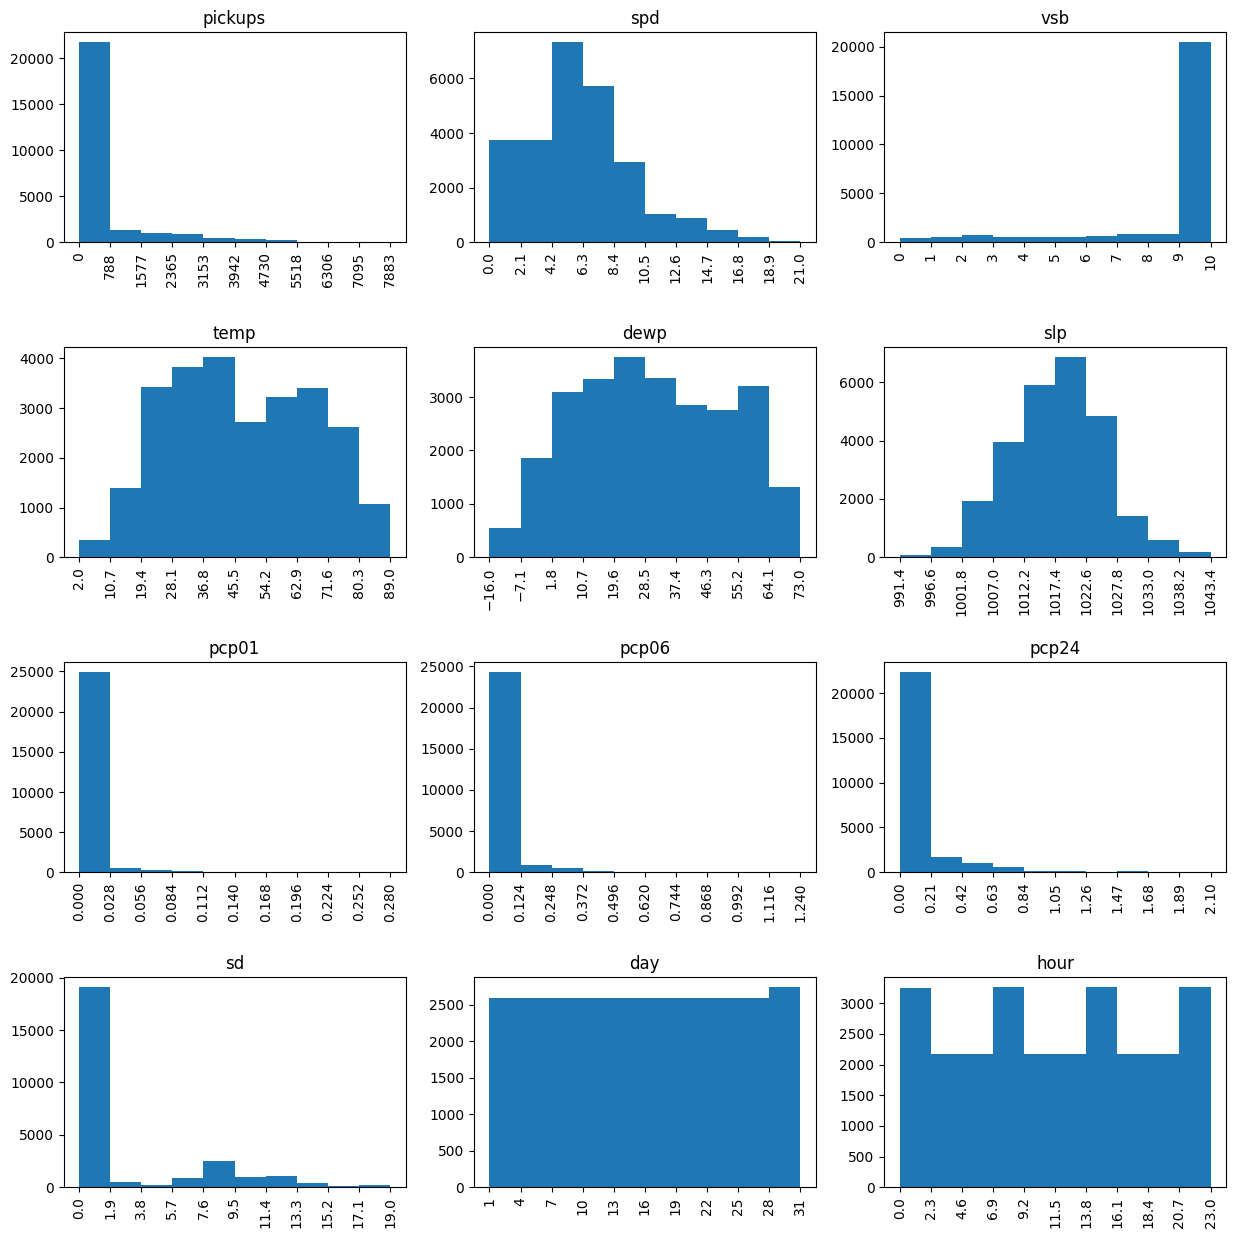

In [65]:
# Matplotlib
fig, axes = plt.subplots(4,3, figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

axes = axes.ravel()
for col, ax in zip(uber_df[num_cols], axes):
  # Para poner los valores exactos de los límites de los bins
  n, bins, edges = ax.hist(uber_df[col])
  ax.set_xticks(bins)
  ax.tick_params(axis='x',rotation=90)
  ax.set(title=f'{col}', xlabel=None)

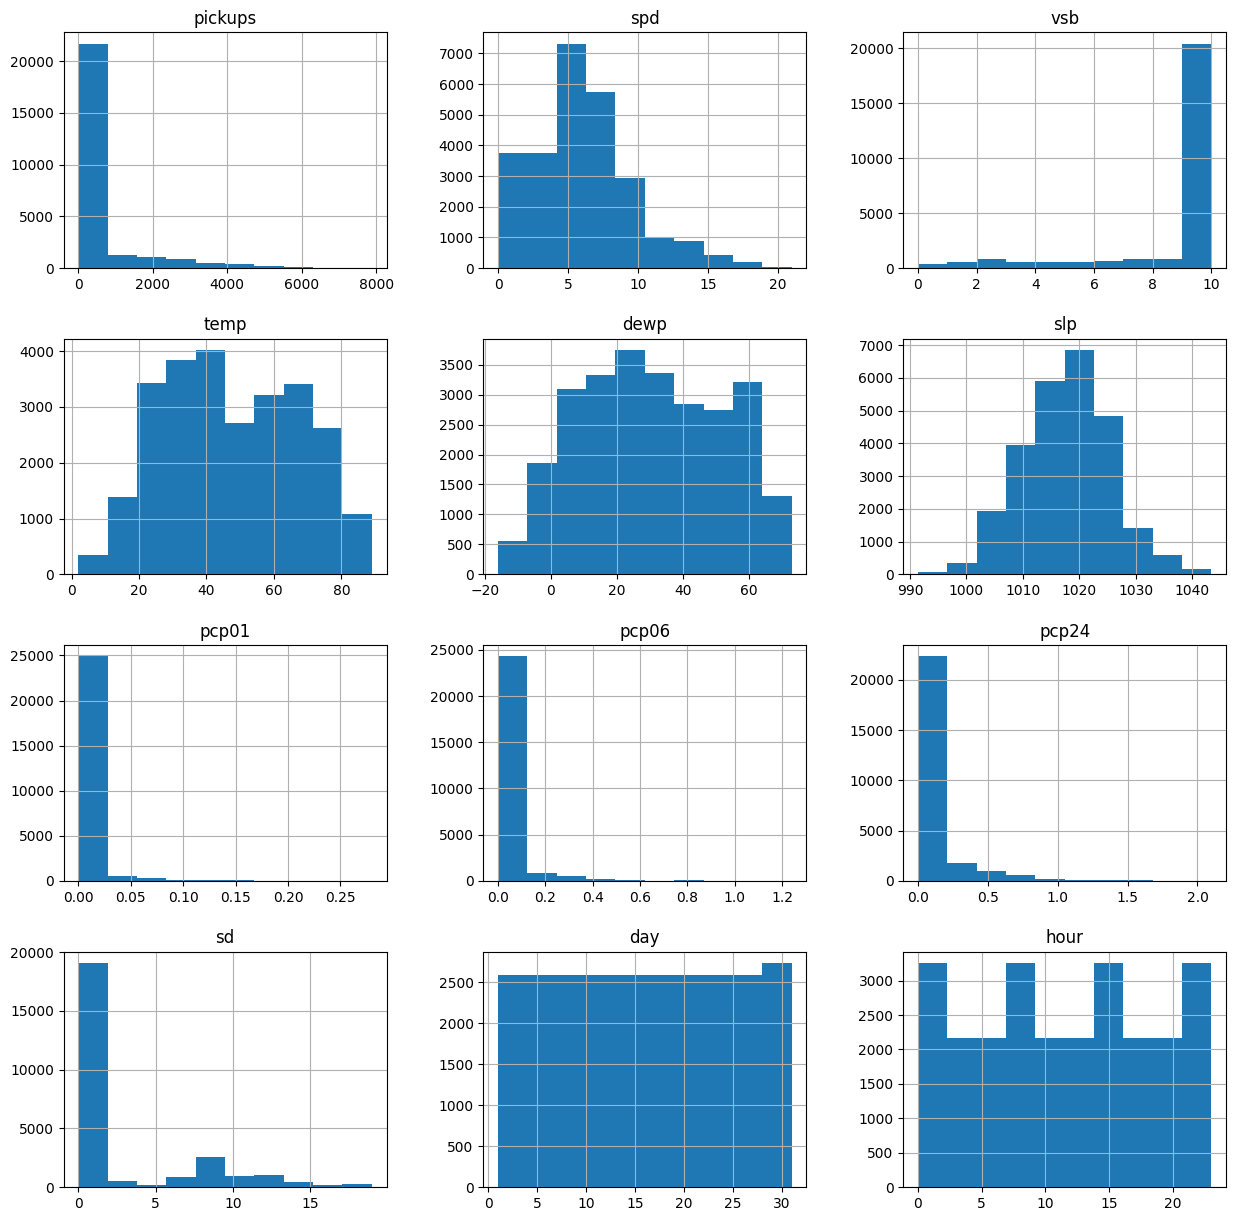

In [66]:
# Pandas
uber_df.hist(figsize=(15,15))
plt.show()

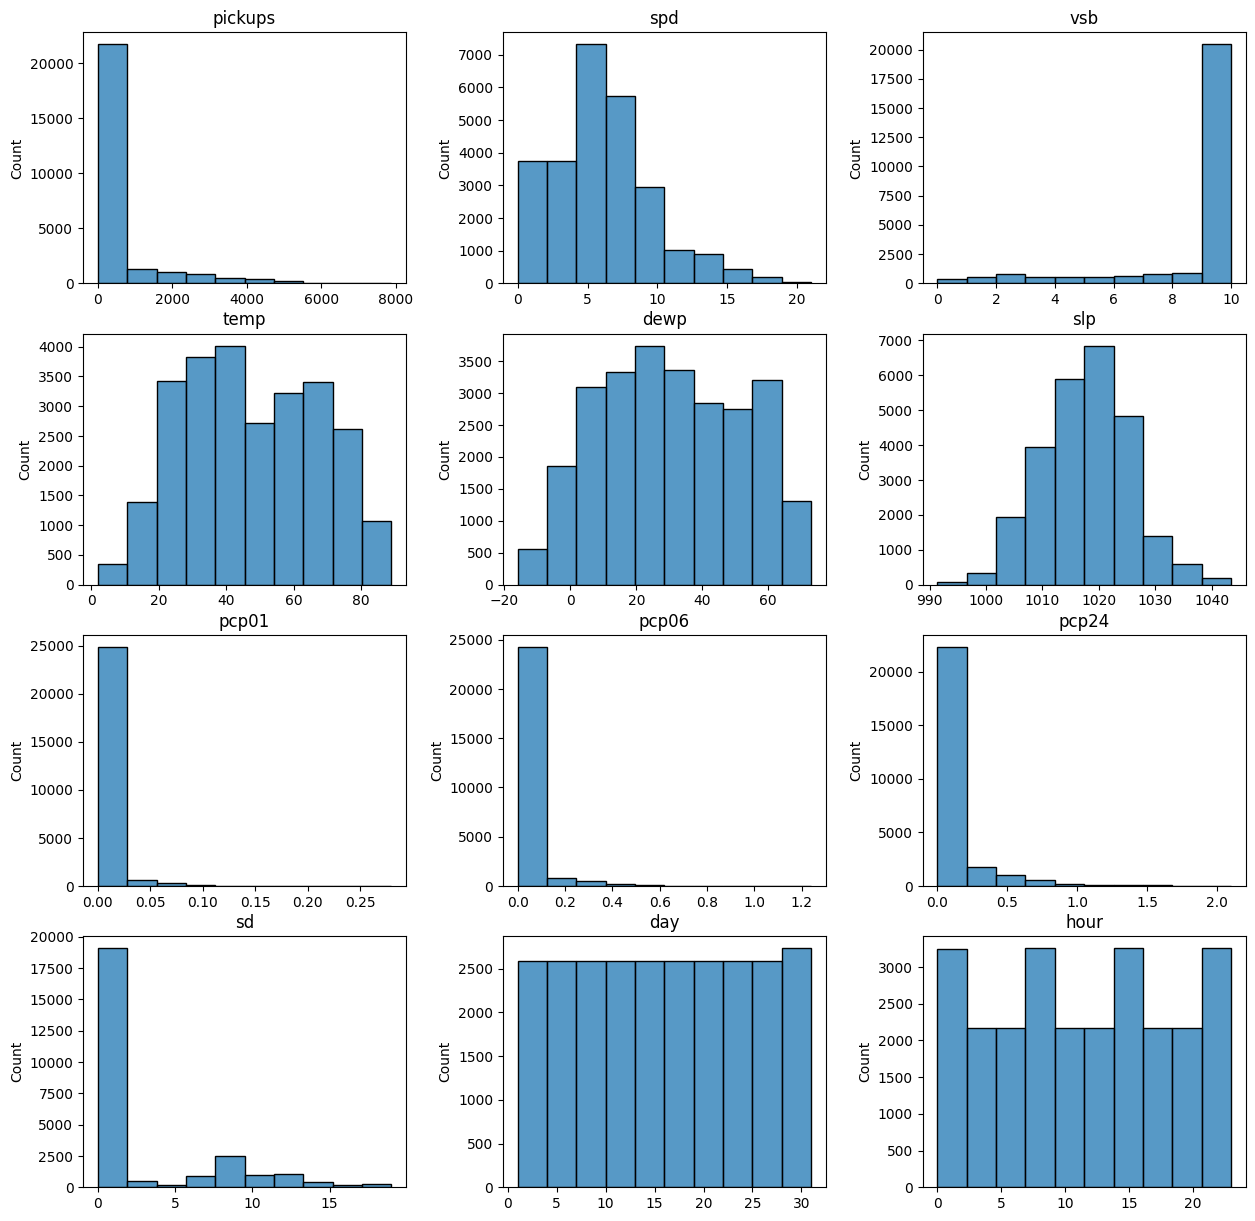

In [67]:
# Se combinan las plataformas:
# - Matplotlib para crear la matriz de subgráficos y escribir los títulos
# - Seaborn para dibujar los histogramas

fig, axes = plt.subplots(4,3, figsize=(15,15)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(uber_df[num_cols], axes):
  sns.histplot(x=uber_df[col], ax=ax, bins=10) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None) # ---> Matplotlib

**pickups**
* La distribución de las recogidas por horas está muy sesgada hacia la derecha.
* Hay muchos valores atípicos en esta variable.
* Si bien la mayoría de las recogidas por hora se encuentran en el extremo inferior, tenemos observaciones en los que las recogidas por hora llegaron hasta 8000.

**vsb**
* La distribución de la "visibilidad" está sesgada hacia la izquierda.
* Sin embargo, hay valores atípicos hacia la izquierda, lo que indica que la visibilidad es extremadamente baja algunos días.
* Será interesante ver cómo la visibilidad afecta la frecuencia de recogida de Uber.

**sd**
* Observamos que hay nevadas en el periodo que estamos analizando.
* Hay valores atípicos en esta variable.
* Habrá que ver cómo afectan las nevadas a las recogidas. Sabemos que es probable que muy pocas personas salgan si está nevando mucho, por lo que nuestras recogidas probablemente disminuirán cuando nieva.

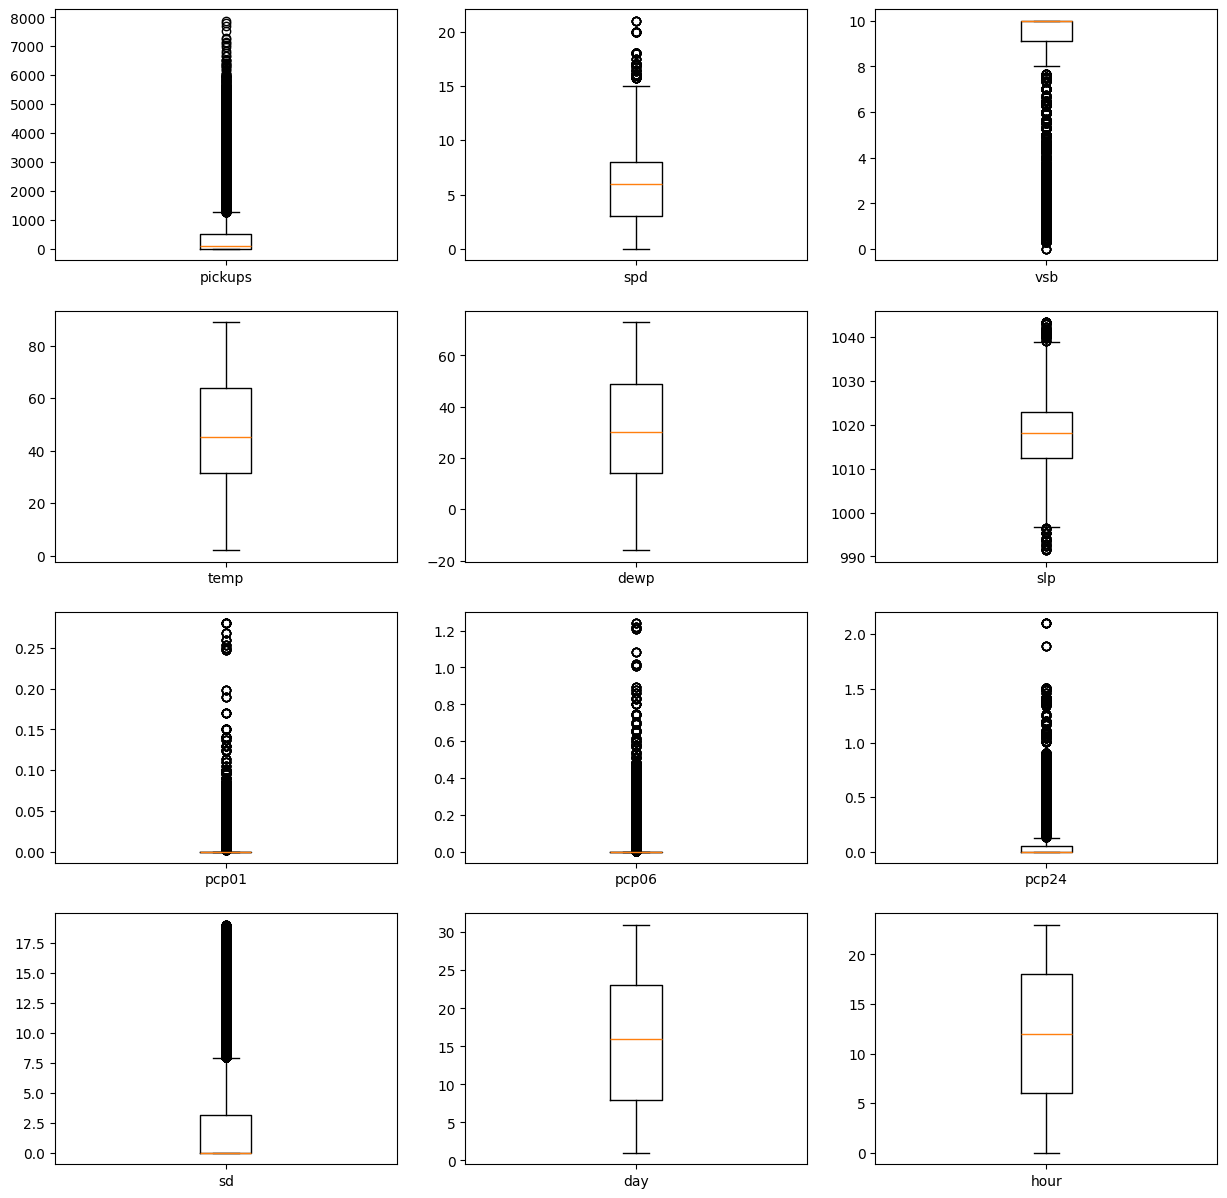

In [68]:
# Matplotlib
fig, axes = plt.subplots(4,3, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(uber_df[num_cols], axes):
  ax.boxplot(uber_df[col], tick_labels=[f'{col}']) # ---> Matplotlib

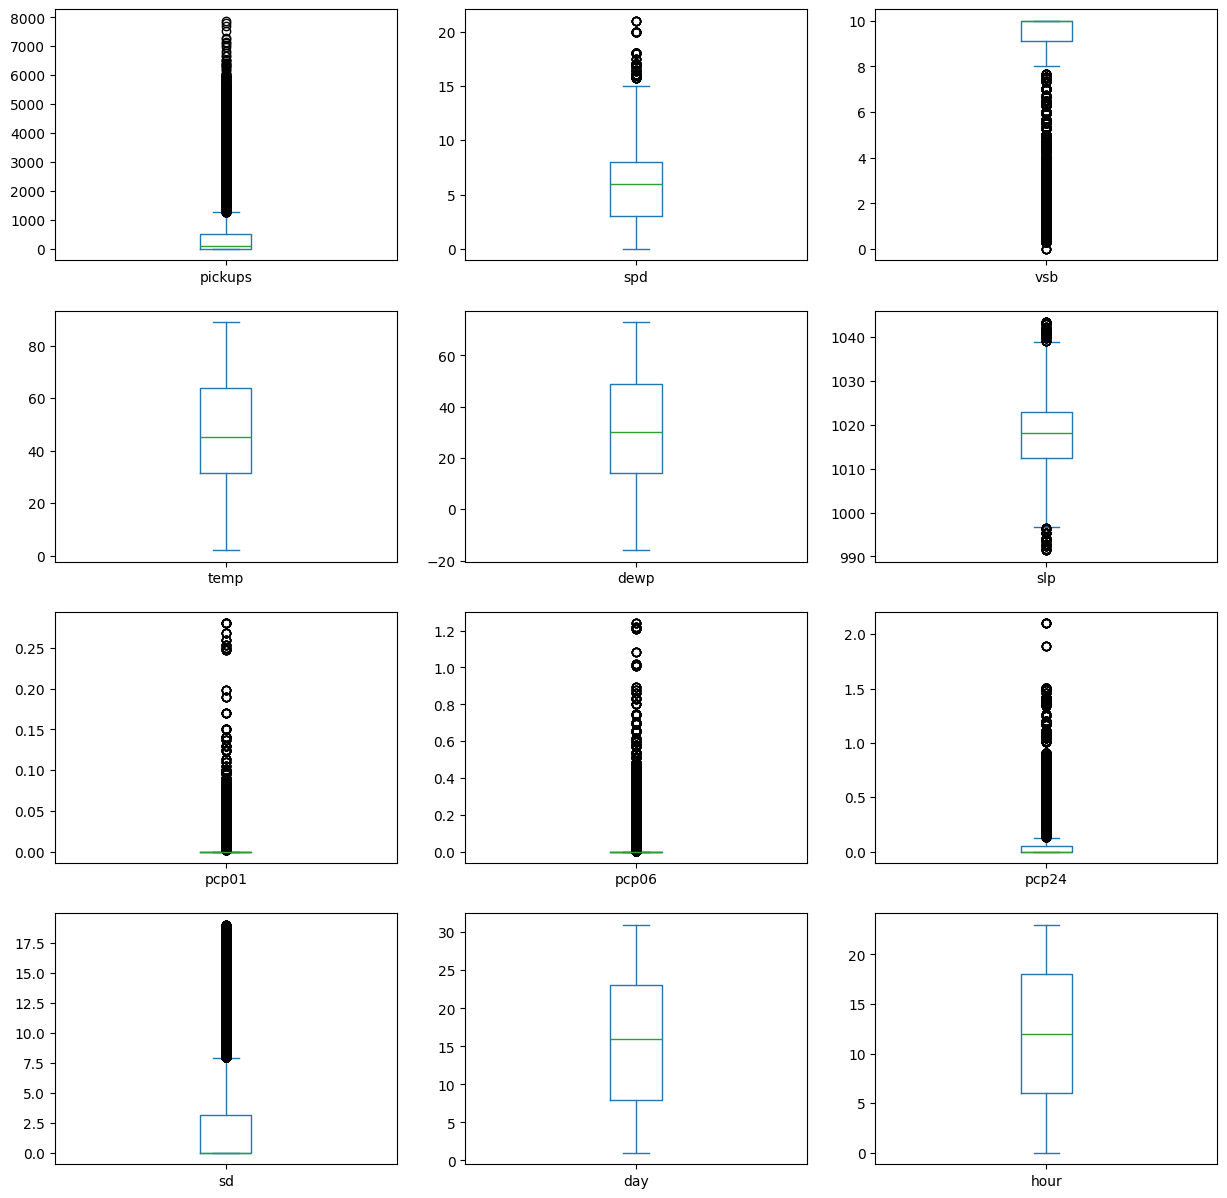

In [69]:
# Se combinan las plataformas:
# - Matplotlib para crear la matriz de subgráficos
# - Pandas para dibujar los boxplots

fig, axes = plt.subplots(4,3, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(uber_df[num_cols], axes):
  uber_df[col].plot(kind='box', ax=ax) # ---> Pandas

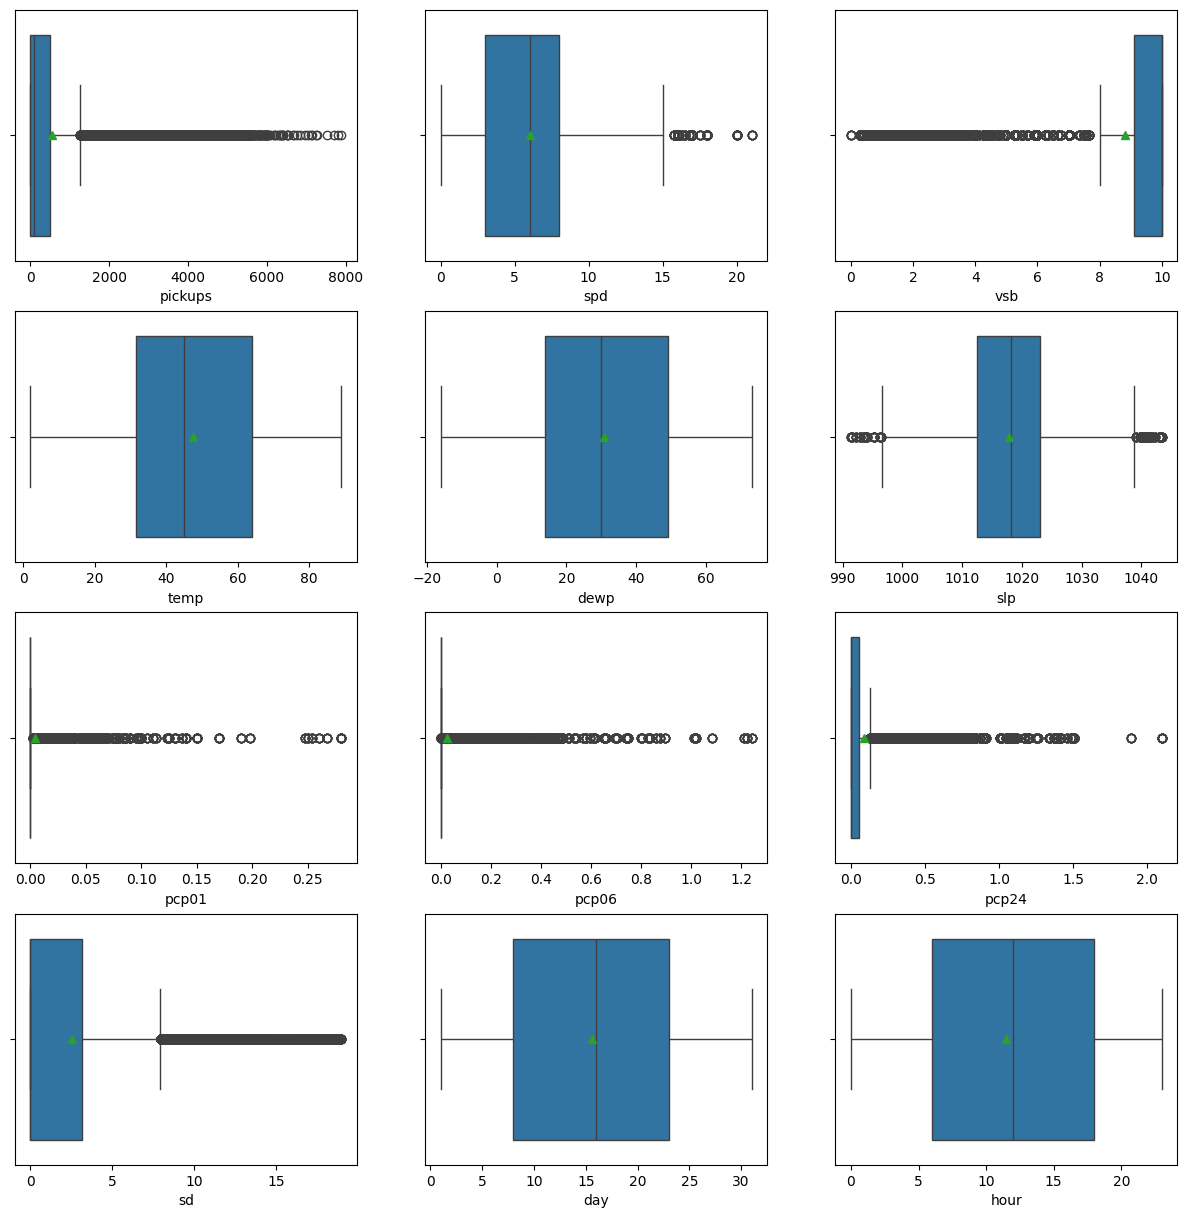

In [70]:
# Se combinan las plataformas:
# - Matplotlib para crear la matriz de subgráficos y escribir los títulos
# - Seaborn para dibujar los boxplots

fig, axes = plt.subplots(4,3, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(uber_df[num_cols], axes):
  sns.boxplot(x=uber_df[col], ax=ax, showmeans=True) # ---> Seaborn
  ax.set(xlabel=f'{col}')

Ahora se analizan las variables categóricas. Se incluyen los gráficos con las 3 librerías (sólo para referencia)

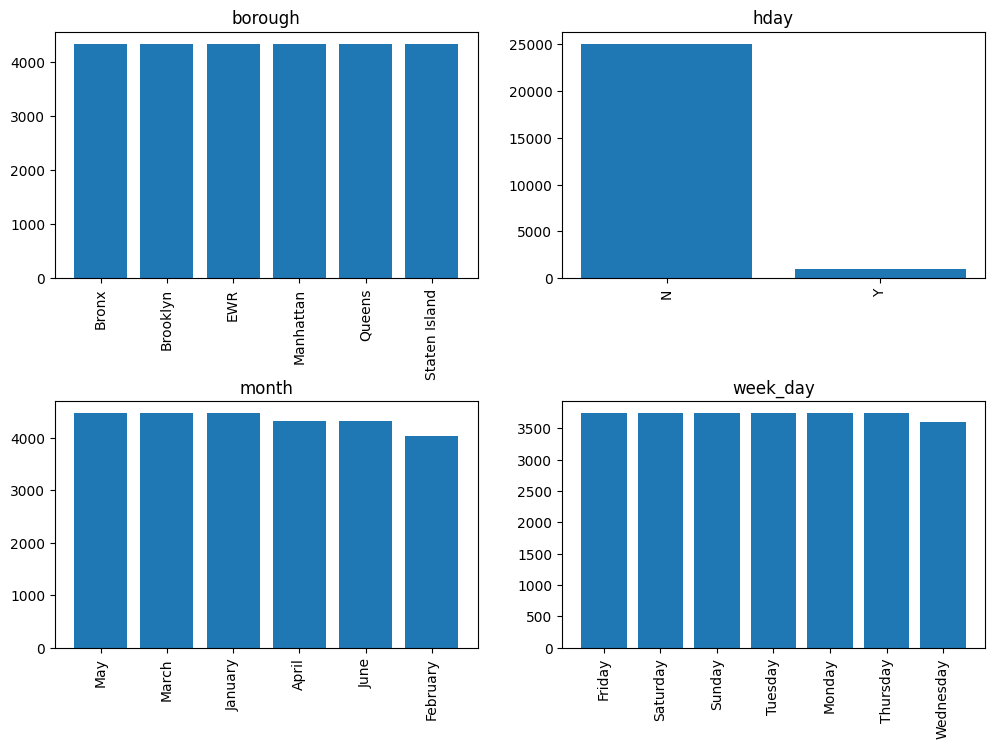

In [71]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(uber_df[cat_cols], axes):
  value_counts = uber_df[col].value_counts()
  ax.bar(value_counts.index, value_counts.values) # ---> Matplotlib
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)

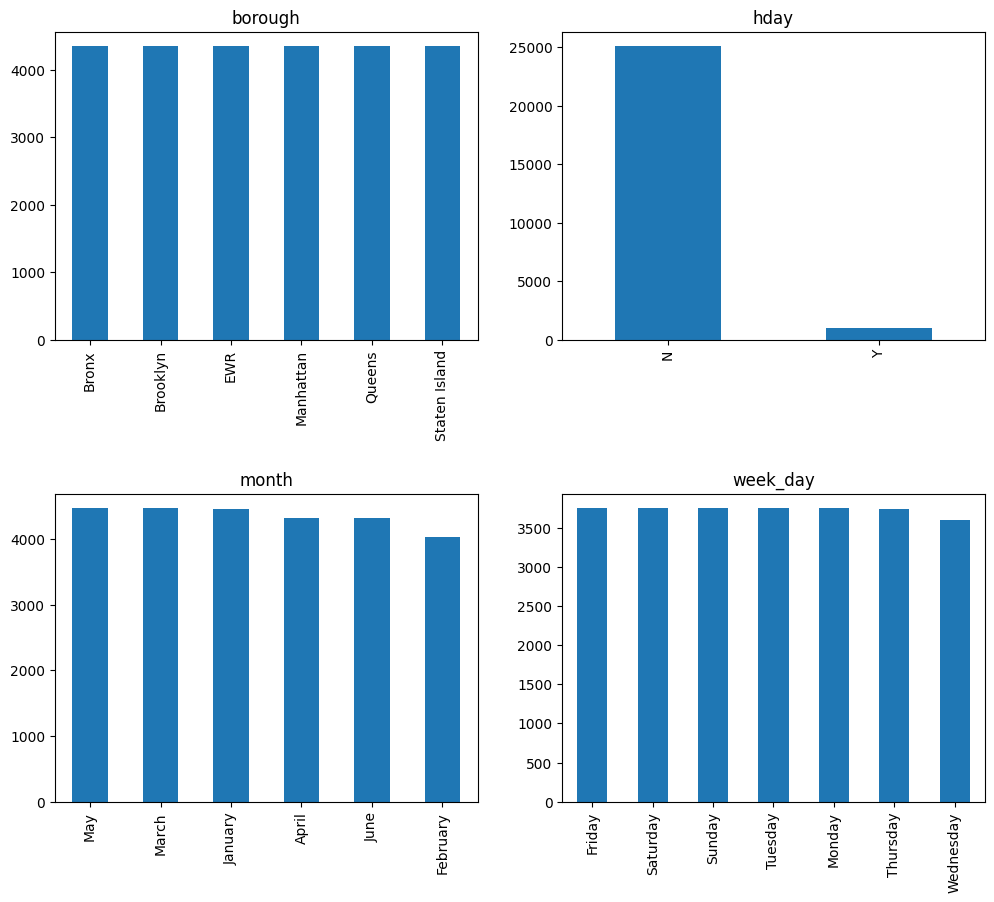

In [72]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(uber_df[cat_cols], axes):
  uber_df[col].value_counts().plot(kind='bar', ax=ax) # ---> Pandas
  ax.set(title=f'{col}', xlabel=None)

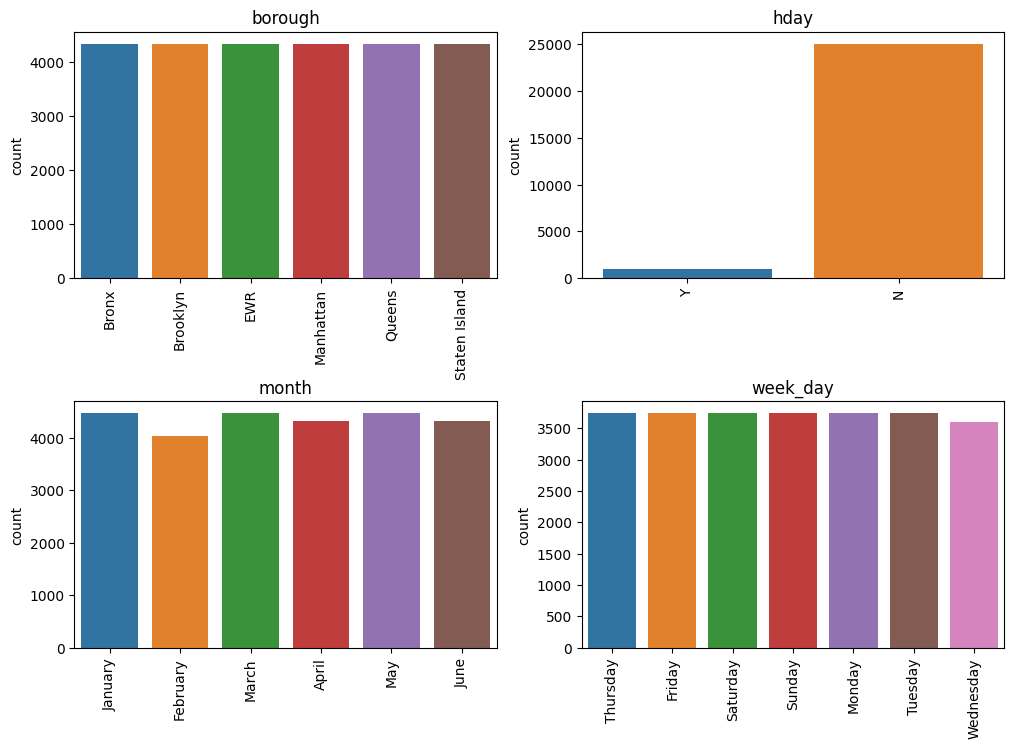

In [73]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(uber_df[cat_cols], axes):
  sns.countplot(x=uber_df[col], hue=uber_df[col], ax=ax) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)

* Muy pocos días fueron festivos en el periodo que analizamos.

* Las observaciones se distribuyen uniformemente entre las ciudades.

## **Análisis Bivariado**

Algunos análisis entre variables numéricas. Se incluyen los gráficos con las 3 librerías (sólo para referencia)

**vsb vs pickups**

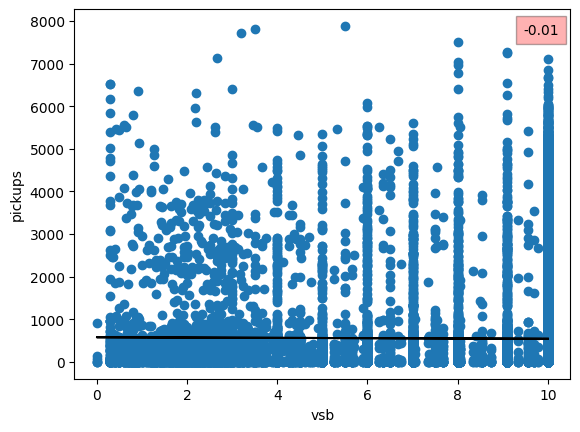

In [74]:
# Matplotlib
plt.scatter(uber_df['vsb'], uber_df['pickups'])
plt.xlabel('vsb')
plt.ylabel('pickups')

# Ejemplo de cómo poner el valor de la correlación en el gráfico
r = uber_df[['vsb','pickups']].corr().iloc[0,1]
plt.text(9.45,7700,round(r,2),bbox=dict(facecolor='red',alpha=0.3,pad=5))

# Calcular la ecuación para la línea de tendencia y colocarla en el gráfico
z = np.polyfit(uber_df['vsb'], uber_df['pickups'], 1)
p = np.poly1d(z)
plt.plot(uber_df['vsb'], p(uber_df['vsb']), color='black')
plt.show()

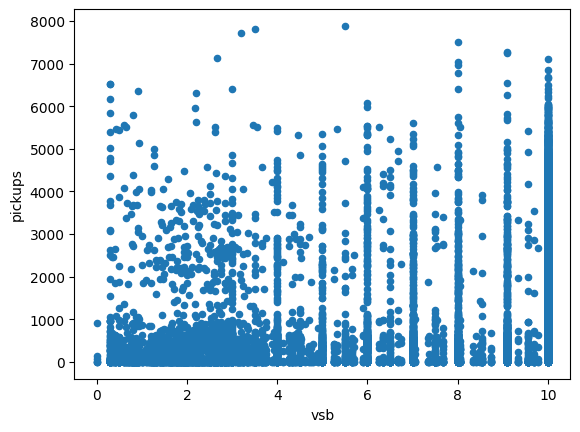

In [75]:
# Pandas
uber_df.plot(kind='scatter',x='vsb',y='pickups')
plt.show()

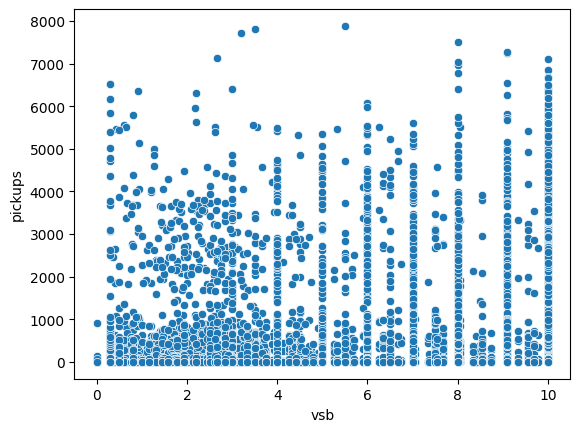

In [76]:
# Seaborn
sns.scatterplot(y=uber_df['pickups'], x=uber_df['vsb'])
plt.show()

**sd vs pickups**

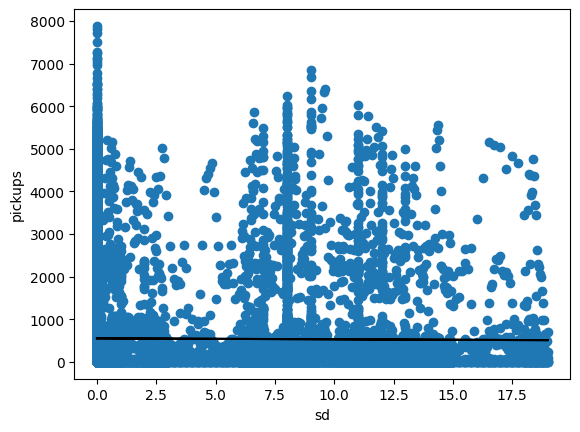

In [77]:
# Matplotlib
plt.scatter(uber_df['sd'], uber_df['pickups'])
plt.xlabel('sd')
plt.ylabel('pickups')

#calculate equation for trendline
z = np.polyfit(uber_df['sd'], uber_df['pickups'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(uber_df['sd'], p(uber_df['sd']), color='black')
plt.show()

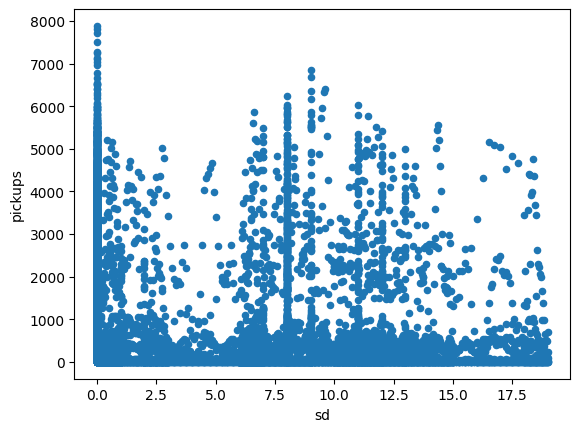

In [78]:
# Pandas
uber_df.plot(kind='scatter',x='sd',y='pickups')
plt.show()

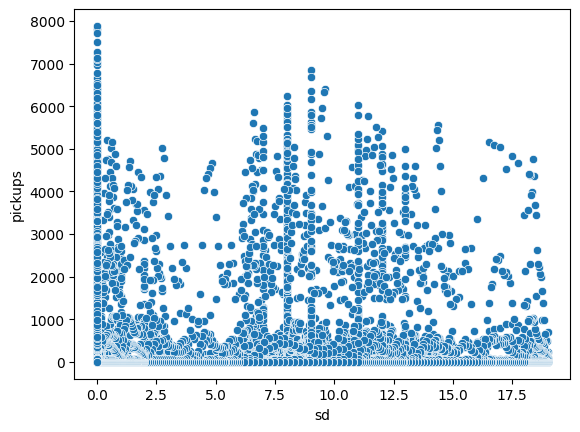

In [79]:
# Seaborn
sns.scatterplot(x=uber_df['sd'], y=uber_df['pickups'])
plt.show()

* De los gráficos de dispersión anteriores no parece haber una relación fuerte entre el número de recogidas y estas estadísticas meteorológicas.

Análisis entre una variable numérica y una cualitativa. Se incluyen los gráficos con las 3 librerías (sólo para referencia)

**borough vs pickups**

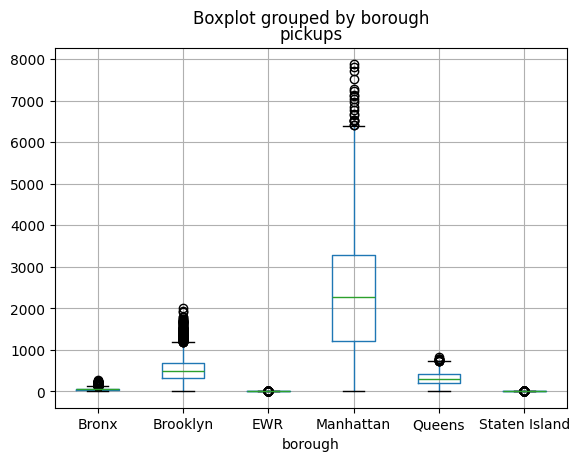

In [80]:
uber_df.boxplot(column='pickups', by='borough') # ---> Pandas
plt.show()

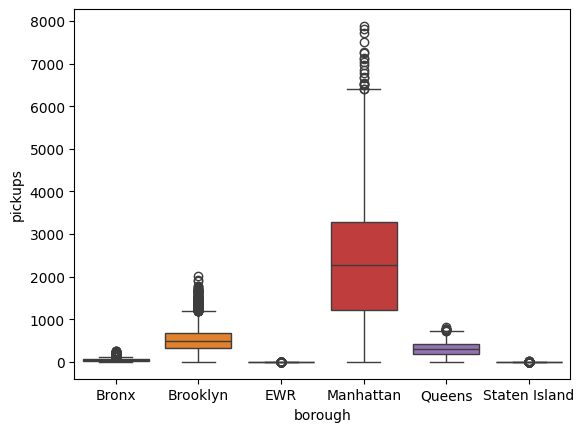

In [81]:
sns.boxplot(x='borough', y='pickups', data=uber_df, hue='borough', legend=False) # ---> Seaborn
plt.show()

* Existe una clara diferencia en el número de pasajeros entre los diferentes distritos.
* Manhattan tiene el mayor número de reservas.
* Brooklyn y Queens son seguidores lejanos.
* EWR y Staten Island tienen un número muy bajo de reservas.

## **Análisis Multivariado**

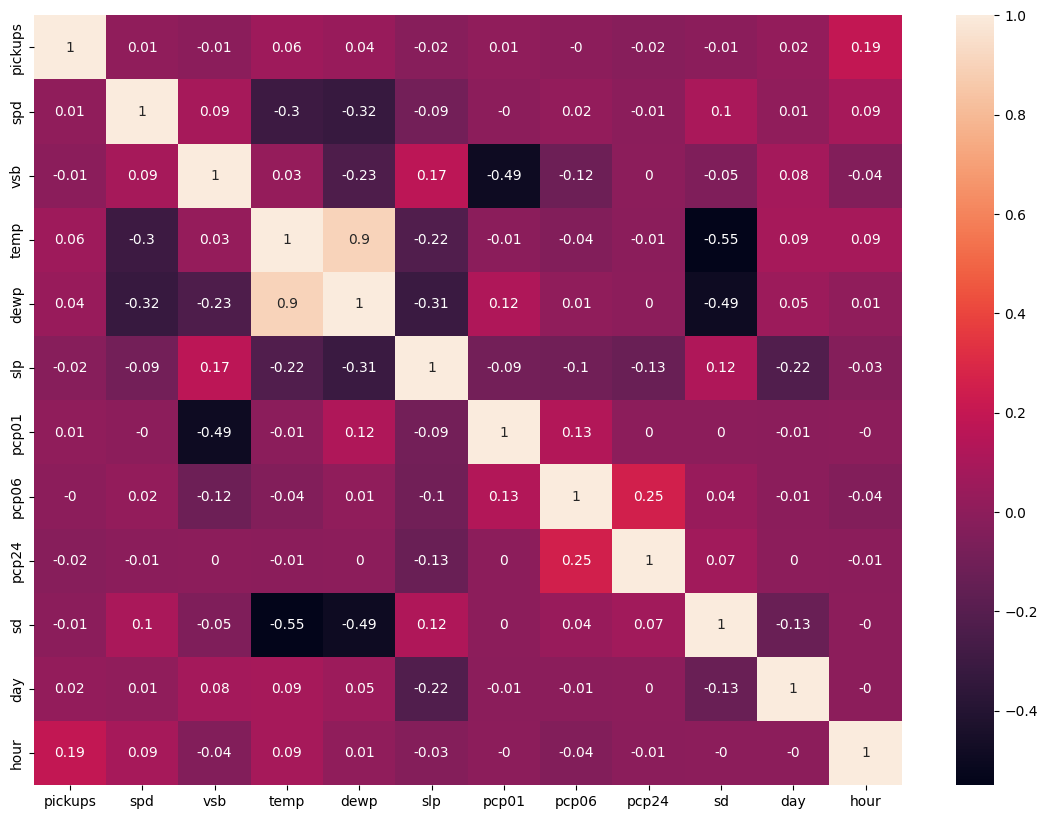

In [82]:
plt.figure(figsize = (14, 10))
sns.heatmap(round(uber_df.corr(numeric_only=True),2), annot = True) # ---> Seaborn
plt.show()

* El punto de rocío (dewp) es una indicación de la humedad, que se correlaciona con la temperatura y lo mismo también se puede observar en el mapa de calor. La temperatura muestra una alta correlación con el punto de rocío.
* La visibilidad se correlaciona negativamente con la precipitación. Si las lluvias son intensas durante la hora, la visibilidad es baja. Esto está alineado con nuestra comprensión intuitiva.
* La profundidad de la nieve, por supuesto, estaría correlacionada negativamente con la temperatura.
* La velocidad del viento y la presión a nivel del mar están correlacionadas negativamente con la temperatura.
* No parece haber una relación fuerte entre el número de recogidas y las estadísticas meteorológicas.
* Es importante señalar que correlación no implica causalidad. Revisa https://hbr.org/2015/06/beware-spurious-correlations para que veas algunos ejemplos espurios.